In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_excel('C:\\Nikhil\\DS\\Assignments\\Clustring\\EastWestAirlines.xlsx',sheet_name = 'data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df=data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
# data.drop(['ID#'], axis =1, inplace = True)

In [6]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
# Normalization function 
def min_max(i):
    x = ((i-i.min())/(i.max()-i.min()))
    return(x)

In [8]:
norm =  min_max(data.iloc[:,1:])

## Hierarchical Clustring

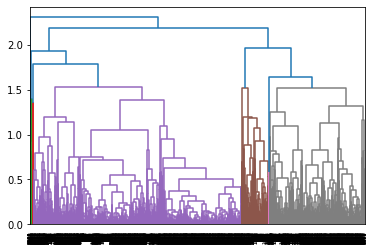

In [9]:
# Createing dendrogram
dendrogram = sch.dendrogram(sch.linkage(norm ,method = 'complete'))

In [10]:
# create clusters &
# save clusters for chart
clust = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete').fit_predict(norm)
clust

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [11]:
cluster = pd.DataFrame(clust, columns = ['Clusters'])
cluster.head()

,Clusters
0,0
1,0
2,0
3,0
4,1


In [12]:
df['Cluster_id_hierarchical'] = cluster
data['Cluster_id_hierarchical'] = cluster
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_id_hierarchical
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [13]:
data.groupby('Cluster_id_hierarchical').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster_id_hierarchical,,,,,,,,,,,,
0,2171.213381,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167
1,1106.516923,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,1923.643357,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000


In [14]:
data.drop('Cluster_id_hierarchical', axis = 1, inplace = True)

 ## K - Means 

In [15]:
from sklearn.cluster import KMeans

In [16]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(norm)
    wcss.append(kmeans.inertia_)

[1830.7932128584114, 823.6756984125207, 625.1684881570721, 436.71719004195575, 348.9433217254136, 319.01115138210804, 287.72955346517995, 263.2142998913928, 243.92574880337366, 226.10985005073988]


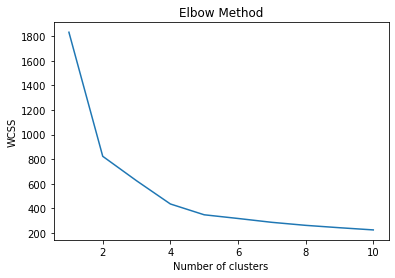

In [17]:
import matplotlib.pyplot as plt
print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(norm)

KMeans(n_clusters=4, random_state=0)

In [19]:
clusters_new.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [20]:
df['Clusters_id_kmeans'] = clusters_new.labels_
data['Clusters_id_kmeans'] = clusters_new.labels_ 
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_id_kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [21]:
data.groupby('Clusters_id_kmeans').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters_id_kmeans,,,,,,,,,,,,
0,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
1,2290.498678,40520.815442,89.978318,1.089900,1.017980,1.004231,3315.847171,6.463247,226.710735,0.658911,3605.113168,0.0
2,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
3,1819.309410,117976.519936,80.437002,3.561404,1.001595,1.022329,31073.451356,17.224880,225.030303,0.633174,4470.706539,0.0


In [22]:
data.drop('Clusters_id_kmeans', axis = 1, inplace = True)

# DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [24]:
# Normalization function 
scaler = StandardScaler()
std = scaler.fit_transform(data)
std

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [25]:
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan.fit_predict(std)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [26]:
#Noisy samples are given the label -1 and others are clusters.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [27]:
df['Clusters_id_DBSCAN'] = dbscan.labels_ 
data['Clusters_id_DBSCAN'] = dbscan.labels_ 
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_id_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [28]:
data.groupby('Clusters_id_DBSCAN').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters_id_DBSCAN,,,,,,,,,,,,
-1,1705.919231,219227.626923,1506.861538,2.657692,1.161538,1.188462,46380.661538,25.065385,3157.869231,9.207692,4757.519231,0.734615
0,2177.128237,57536.474312,32.782162,1.694616,1.000000,1.000000,9752.446774,8.864776,186.642828,0.546650,3811.589396,0.000000
1,1766.324806,74975.804651,81.217829,2.640310,1.000000,1.000000,25293.439535,14.027132,435.089147,1.361240,4576.269767,1.000000
2,2388.250000,39218.500000,0.000000,1.000000,2.000000,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000


In [29]:
# Now here, values of all types of method for clustering with data  
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_id_hierarchical,Clusters_id_kmeans,Clusters_id_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2,1
